**In this project, we will be extracting live Stock Market data from yahoo finance. We will find similarities amongst various companies using their stock market prices and then cluster them into different clusters using the K-means algorithm.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import datetime

In [2]:
companies_dict={'Amazon':'AMZN',
               'Apple':'AAPL',
               'Walgreen':'WBA',
               'Northrop Grumman':'NOC',
               'Boeing':'BA',
               'Lockheed Martin':'LMT',
               'McDonalds':'MCD',
               'Intel':'INTC',
               'Navistar':'NAV',
               'IBM':'IBM',
               'Texas Instruments':'TXN',
               'MasterCard':'MA',
               'Microsoft':'MSFT',
               'General Electrics':'GE',
               'American Express':'AXP',
               'Pepsi':'PEP',
               'Coca Cola':'KO',
               'Johnson & Johnson':'JNJ',
               'Toyota':'TM',
               'Honda':'HMC',
               'Mistubishi':'MMTOF',
               'Sony':'SNE',
               'Exxon':'XOM',
               'Chevron':'CVX',
               'Valero Energy':'VLO',
               'Ford':'F',
               'Bank of America':'BAC'}

In [3]:
data_source = 'yahoo'
start_date = '2015-04-25'
end_date = '2020-04-25'
df = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)

In [4]:
df.head()

Attributes   Adj Close                                                \
Symbols           AMZN       AAPL        WBA         NOC          BA   
Date                                                                   
2015-04-24  445.100006  29.742304  73.431702  146.707657  130.596771   
2015-04-27  438.559998  30.283358  73.551285  145.211411  130.068787   
2015-04-28  429.309998  29.806231  73.517113  145.555969  129.813538   
2015-04-29  429.369995  29.367901  72.227478  144.313583  128.616730   
2015-04-30  421.779999  28.571152  70.826820  139.688736  126.143806   

Attributes                                                           ...  \
Symbols            LMT        MCD       INTC        NAV         IBM  ...   
Date                                                                 ...   
2015-04-24  166.500504  84.084412  27.255543  30.160000  131.424652  ...   
2015-04-27  165.196625  82.125793  27.612375  29.940001  132.159988  ...   
2015-04-28  165.350037  82.457924  28.054171  29.900000  134.629410  ...   
2015-04-29  163.023483  82.619690  27.943726  30.150000  135.000916  ...   
2015-04-30  159.026489  82.219467  27.654858  29.959999  132.593491  ...   

Attributes      Volume                                                    \
Symbols            JNJ        TM        HMC MMTOF        SNE         XOM   
Date                                                                       
2015-04-24   6566900.0  277500.0   824800.0   0.0  3291100.0   8405700.0   
2015-04-27   9113900.0  273000.0   557200.0   0.0  1472600.0  10534600.0   
2015-04-28   7484600.0  421900.0  2455300.0   0.0   957100.0   9633800.0   
2015-04-29   8926200.0  282900.0  1481400.0   0.0  1089200.0  12534100.0   
2015-04-30  10170600.0  246800.0   750000.0   0.0  1271100.0  13947700.0   

Attributes                                                 
Symbols           CVX        VLO           F          BAC  
Date                                                       
2015-04-24  4995000.0  5277700.0  20293300.0   40766100.0  
2015-04-27  4858700.0  8056400.0  34824900.0   73523400.0  
2015-04-28  5321600.0  7905400.0  56634200.0   58080100.0  
2015-04-29  5665800.0  6002600.0  35126900.0  134499400.0  
2015-04-30  6666800.0  8067500.0  30269300.0   78313900.0  

[5 rows x 162 columns]

In [5]:
df.columns

MultiIndex([('Adj Close',  'AMZN'),
            ('Adj Close',  'AAPL'),
            ('Adj Close',   'WBA'),
            ('Adj Close',   'NOC'),
            ('Adj Close',    'BA'),
            ('Adj Close',   'LMT'),
            ('Adj Close',   'MCD'),
            ('Adj Close',  'INTC'),
            ('Adj Close',   'NAV'),
            ('Adj Close',   'IBM'),
            ...
            (   'Volume',   'JNJ'),
            (   'Volume',    'TM'),
            (   'Volume',   'HMC'),
            (   'Volume', 'MMTOF'),
            (   'Volume',   'SNE'),
            (   'Volume',   'XOM'),
            (   'Volume',   'CVX'),
            (   'Volume',   'VLO'),
            (   'Volume',     'F'),
            (   'Volume',   'BAC')],
           names=['Attributes', 'Symbols'], length=162)

In [6]:
sum(df.isna().sum())

0

In [7]:
stock_open = np.array(df['Open']).T
stock_close = np.array(df['Close']).T

In [8]:
movement = stock_close - stock_open 

In [9]:
total_movement = np.sum(movement,1)

In [10]:
for i in range(len(companies_dict)):
    print('Company: {}, change: {:.2f}'.format(df['High'].columns[i],total_movement[i]))

Company: AMZN, change: -160.47
Company: AAPL, change: 45.97
Company: WBA, change: -37.49
Company: NOC, change: 78.52
Company: BA, change: -74.28
Company: LMT, change: 45.69
Company: MCD, change: 50.87
Company: INTC, change: 42.16
Company: NAV, change: -38.80
Company: IBM, change: -11.75
Company: TXN, change: 46.84
Company: MA, change: 69.43
Company: MSFT, change: 32.17
Company: GE, change: -7.40
Company: AXP, change: -8.07
Company: PEP, change: 52.98
Company: KO, change: 13.53
Company: JNJ, change: 47.08
Company: TM, change: -52.01
Company: HMC, change: -21.43
Company: MMTOF, change: -0.32
Company: SNE, change: -19.24
Company: XOM, change: -23.74
Company: CVX, change: -21.47
Company: VLO, change: -30.13
Company: F, change: -14.95
Company: BAC, change: 2.36


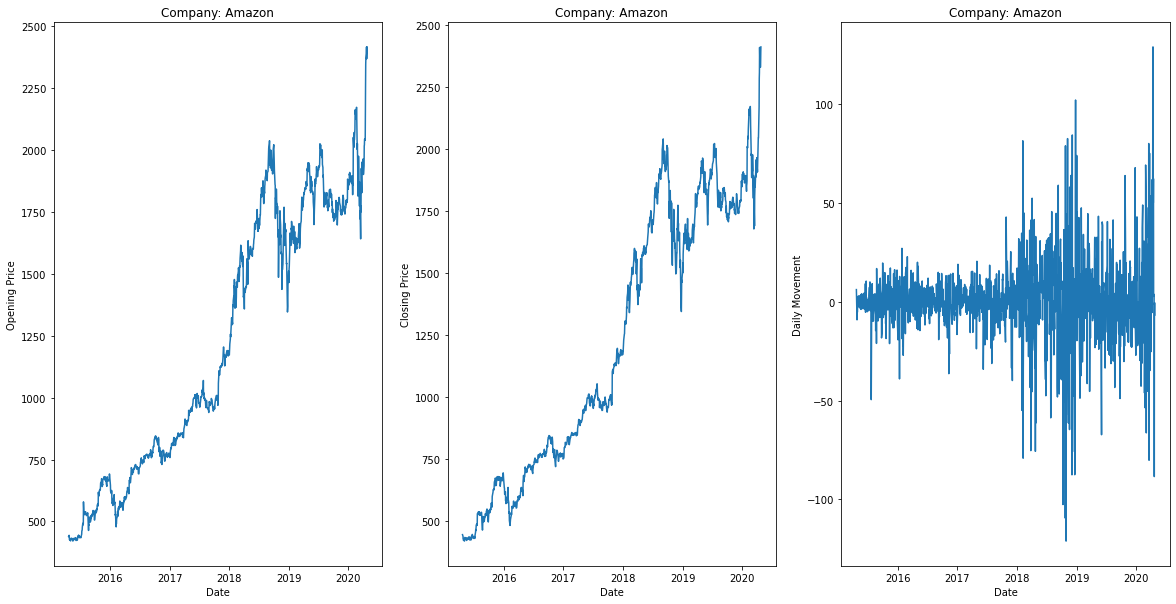

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.title('Company: Amazon')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.plot(df['Open']['AMZN'])

plt.subplot(1,3,2)
plt.title('Company: Amazon')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df['Close']['AMZN'])

plt.subplot(1,3,3)
plt.title('Company: Amazon')
plt.xlabel('Date')
plt.ylabel('Daily Movement')
plt.plot(df['Close']['AMZN']-df['Open']['AMZN']);

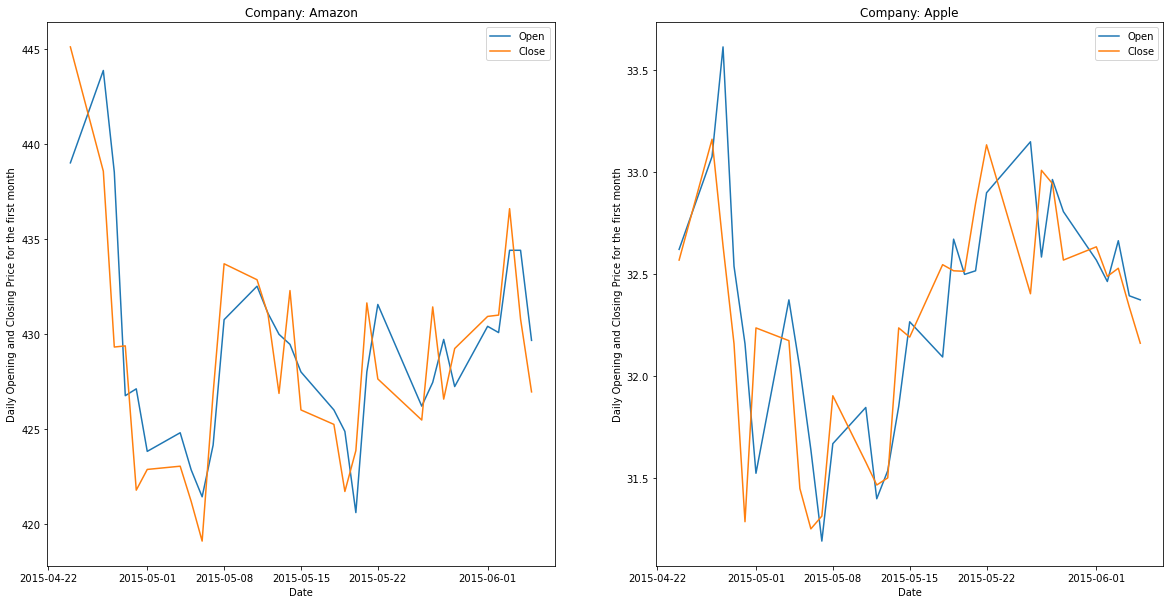

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Company: Amazon')
plt.xlabel('Date')
plt.ylabel('Daily Opening and Closing Price for the first month')
plt.plot(df.iloc[:30]['Open']['AMZN'],label = 'Open')
plt.plot(df.iloc[:30]['Close']['AMZN'],label = 'Close')
plt.legend();

plt.subplot(1,2,2)
plt.title('Company: Apple')
plt.xlabel('Date')
plt.ylabel('Daily Opening and Closing Price for the first month')
plt.plot(df.iloc[:30]['Open']['AAPL'],label = 'Open')
plt.plot(df.iloc[:30]['Close']['AAPL'],label = 'Close')
plt.legend();

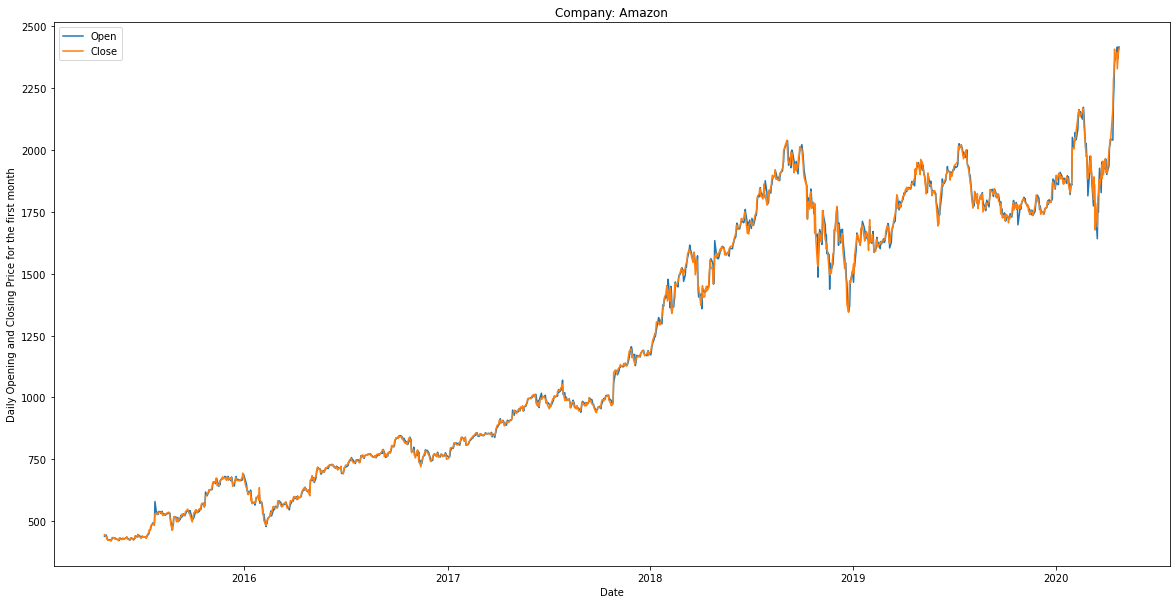

In [13]:
plt.figure(figsize=(20,10))

plt.title('Company: Amazon')
plt.xlabel('Date')
plt.ylabel('Daily Opening and Closing Price for the first month')
plt.plot(df['Open']['AMZN'],label = 'Open')
plt.plot(df['Close']['AMZN'],label = 'Close')
plt.legend();

**Normalization**

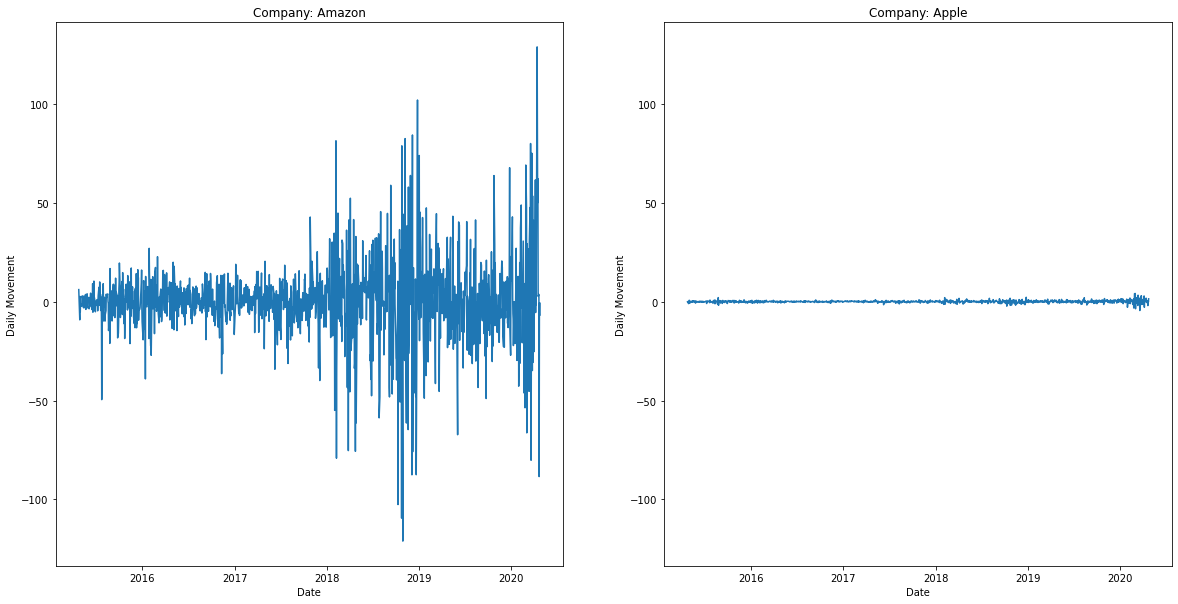

In [14]:
plt.figure(figsize=(20,10))

ax1 =plt.subplot(1,2,1)
plt.title('Company: Amazon')
plt.xlabel('Date')
plt.ylabel('Daily Movement')
plt.plot(df['Close']['AMZN']-df['Open']['AMZN']);

plt.subplot(1,2,2,sharey = ax1)
plt.title('Company: Apple')
plt.xlabel('Date')
plt.ylabel('Daily Movement')
plt.plot(df['Close']['AAPL']-df['Open']['AAPL']);


Because of the varying scale of the data as seen above, we need to normalize the data.

In [15]:
normalizer = Normalizer()
norm_movement = normalizer.fit_transform(movement)

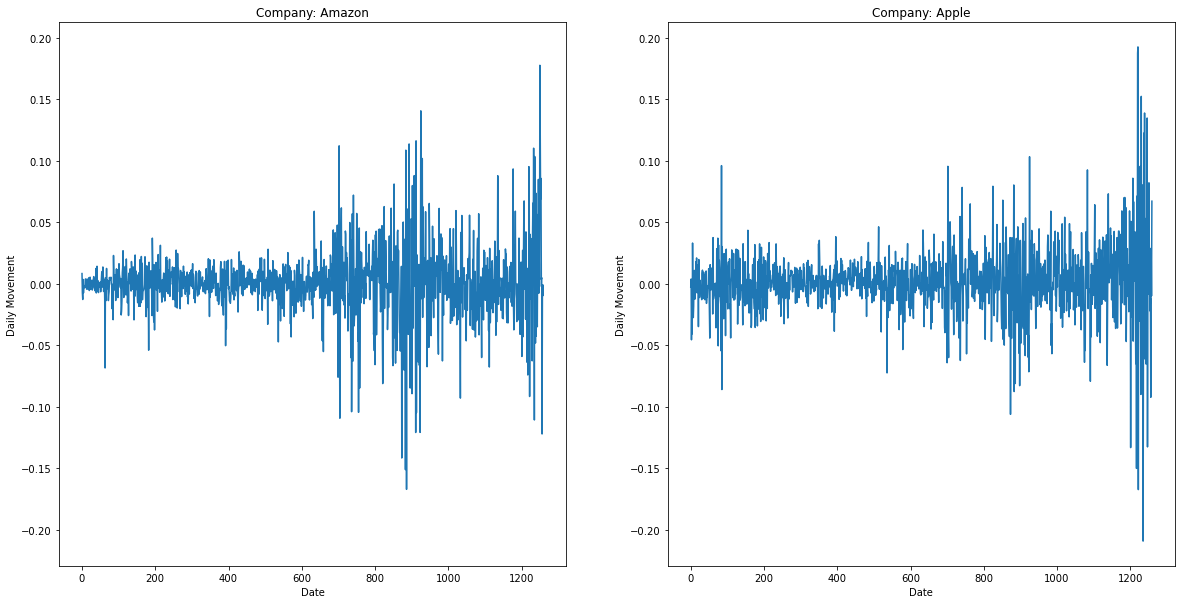

In [16]:
plt.figure(figsize=(20,10))

ax1 =plt.subplot(1,2,1)
plt.title('Company: Amazon')
plt.xlabel('Date')
plt.ylabel('Daily Movement')
plt.plot(norm_movement[0]);

plt.subplot(1,2,2,sharey = ax1)
plt.title('Company: Apple')
plt.xlabel('Date')
plt.ylabel('Daily Movement')
plt.plot(norm_movement[1]);


### Creating a Pipeline

In [17]:
normalizer = Normalizer()

kMeans =KMeans(n_clusters=5, max_iter=1000, random_state=1)

pipeline = make_pipeline(normalizer, kMeans)

pipeline.fit(movement)
predictions = pipeline.predict(movement)

In [18]:
predictions

array([0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 3, 0,
       4, 4, 4, 2, 0])

Companies and their respective clusters

In [19]:
df1 = pd.DataFrame({'Cluster':predictions,'Companies':list(companies_dict)})

In [20]:
df1

,Cluster,Companies
0,0,Amazon
1,0,Apple
2,1,Walgreen
3,1,Northrop Grumman
4,0,Boeing
5,1,Lockheed Martin
6,1,McDonalds
7,0,Intel
8,2,Navistar
9,0,IBM


In [21]:
df1[df1['Cluster']==0]

,Cluster,Companies
0,0,Amazon
1,0,Apple
4,0,Boeing
7,0,Intel
9,0,IBM
10,0,Texas Instruments
11,0,MasterCard
12,0,Microsoft
14,0,American Express
21,0,Sony


### Dimension Reduction (PCA)

In [22]:
norm_movement.shape

(27, 1260)

In [23]:
normalizer = Normalizer()

pca_data = PCA(n_components=2)

kMeans =KMeans(n_clusters=5, max_iter=1000, random_state=1)

pipeline = make_pipeline(normalizer, pca_data, kMeans)

pipeline.fit(movement)
predictions = pipeline.predict(movement)

Companies and their respective clusters

In [24]:
df2 = pd.DataFrame({'Cluster':predictions,'Companies':list(companies_dict)})

In [25]:
df2.sort_values(by='Cluster',inplace=True)

In [26]:
df2.reset_index(inplace=True,drop=True)

In [27]:
df2[df2['Cluster']==0]

,Cluster,Companies
0,0,General Electrics
1,0,Chevron
2,0,Exxon
3,0,Navistar
4,0,Ford


## Plotting Decision Boundary

<Figure size 432x288 with 0 Axes>

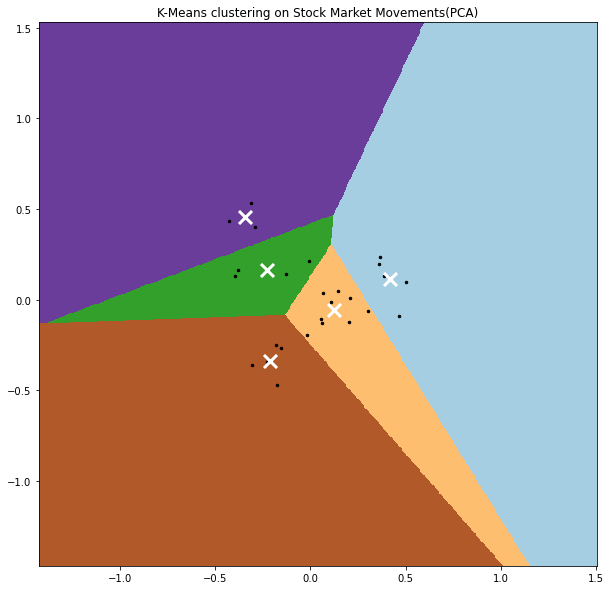

In [28]:
# reducing the dimensions
pca_data = PCA(n_components=2).fit_transform(norm_movement)

# defining step size of mesh
h = 0.005

# Plot decision boundary
x_min, x_max = pca_data[:,0].min()-1,pca_data[:,0].max()+1
y_min, y_max = pca_data[:,1].min()-1,pca_data[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Labels for each point in the mesh
kpred = kMeans.predict(np.c_[xx.ravel(),yy.ravel()])
# putting the results into a color plot
kpred = kpred.reshape(xx.shape)
# defining color plot
cmap = plt.cm.Paired

#Plotting 
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(kpred, interpolation='nearest', extent=(xx.min(),xx.max(),yy.min(),yy.max()), cmap=cmap, aspect = 'auto', origin='lower')
plt.plot(pca_data[:,0],pca_data[:,1],'.k', markersize = 5);

#Plotting the centroid
centroid = kMeans.cluster_centers_
plt.scatter(centroid[:,0],centroid[:,1],marker='x',s=170,linewidths=3,color = 'w',zorder=10)
plt.title('K-Means clustering on Stock Market Movements(PCA)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show();